# Modelo de Segregación de Schelling (Discreto)

### Reglas


- Dos diferentes tipos de agentes distribuidos en un espacio finito de dimensión 2.
- En cada iteración se elige un agente al azar se ve a sus vecinos y si cierta fracción de ellos son del otro tipo, salta a otro lugar aleatoriamente escogido en el espacio.


## Agente del modelo de Schelling

Creamos una clase para el agente. En el `__init__` definimos las propiedades internas de cada agente 

In [1]:
class AgenteSchelling:
    """
    Agente del modelo de Schelling Discreto
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al agente. Float.        
    """
    def __init__(self,color,pos, tolerancia):
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia

#### Creamos un agente a partir de nuestra clase definida arriba

In [2]:
agente1 = AgenteSchelling('red',(0,1),0.6)

#### A través del punto (.) podemos acceder a los atributos de nuestra clase agente

In [109]:
print(agente1.color)
print(agente1.pos)
print(agente1.tolerancia)

rojo
(0, 0)
0.4


## Importamos la clase Agent y Model del modulo `mesa`

Utilizaremos la ventajas de la OOP (programación orientada a objetos) y creamos una clase secundaria a partir de la clase `Agent`  de `mesa`.

In [3]:
from mesa import Agent, Model

In [14]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        

También creamos una clase secundaria para nuestro modelo a partir de la clase `Model`  de `mesa`.

In [14]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    """
    def __init__(self,ancho,largo):
        self.ancho = ancho
        self.largo = largo

## Definimos el espacio donde se van a mover los agentes

`mesa.space` contiene diferentes tipos de mallas donde se moverán los agentes:  `Single, MultiGrid, ContinouosSpace, HexGrid, NetworkGrid.`
`SingleGrid` permite colocar solo un agente en cada posición de la malla

In [4]:
from mesa.space import SingleGrid 

In [14]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    """
    def __init__(self,ancho,largo):
        self.ancho = ancho
        self.largo = largo
        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)

#### Inicializamos el modelo

In [17]:
modelo_prueba = ModeloSchelling(10,10)

# Atributos del modelo
print(modelo_prueba.ancho)
print(modelo_prueba.largo)

10
10


#### Inicializamos un agente

In [11]:
agente1 = AgenteSchelling('rojo',(0,0), 0.4,modelo_prueba)

# Atributos del agente
print(agente1.color)
print(agente1.pos)
print(agente1.tolerancia)

rojo
(0, 0)
0.4


#### Podemos acceder a la malla

In [18]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None]]

#### Con `.find_empty` podemos encontrar posciones en la malla que estén vacías

In [21]:
modelo_prueba.grid.find_empty()

(2, 9)

## Definimos la regla que obecede cada agente

Dentro de nuestra clase `AgenteSchelling` se define un método que llamado `step()` en el cual se programará las regla que siguen los agentes.

In [35]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
        
    """
    def __init__(self,color,pos, tolerancia, model):
        # Aqui van los atributos del agente
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.tolerancia:
            self.model.grid.move_to_empty(self)
        

## Definimos la configuración inicial del modelo

In [25]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Con torus=True le decimos que active la topología en forma de toroide
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(color,pos,tolerancia, self )
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)

#### Inicializamos el modelo

In [26]:
modelo_prueba = ModeloSchelling(10,10,2)

#### Podemos acceder a la malla y saber que posciones ocupan los agentes en el espacio

In [27]:
modelo_prueba.grid.grid

[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,

#### Colocándonos en la posición del agente dentro de la malla podemos acceder a los atributos del agente

In [31]:
modelo_prueba.grid.grid[9][9].color

'blue'

### ¿En qué orden vamos a activar los agentes en cada iteración?

`mesa.time` contiene tres diferentes activación:  `BasedScheduler, RandomActivation, SimultaneousActivation, StagedActivation`
Con`RandomActivation` el orden de los agentes es aleatorio en cada iteracción o paso.

In [5]:
from mesa.time import RandomActivation 

In [93]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(color,pos,tolerancia,self)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

#### Inicializamos el modelo

In [95]:
modelo_p1 = ModeloSchelling(10,10,70)

AttributeError: 'AgenteSchelling' object has no attribute 'unique_id'

Nos marca un error. Esto se debe a que la clase raíz `Agent`, en la que basaremos nuestros agentes, necesita como argumentos un _identificador único_ y el _modelo_ como argumentos para inicializar un agente. Además queremos inicializar los valores en la clase raíz, por lo que utilizamos `super().__init__(unique_id,model)` así que modificamos los argumentos del constructor de la clase `AgenteSchelling` además donde creamos los agentes dentro del modelo `ModeloSchelling`


In [35]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
        modelo: Nuestro clase modelo. Modelo mesa.
        
    """
    def __init__(self,unique_id, model,color,pos, tolerancia):
        # Aqui van los atributos del agente
        super().__init__(unique_id,model)
        self.color = color
        self.pos = pos
        self.tolerancia = tolerancia
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.tolerancia:
            self.model.grid.move_to_empty(self)
        

In [93]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    """
    def __init__(self,ancho,largo, cantidad):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(i,self, color,pos,tolerancia)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

### Inicializamos el modelo

In [104]:
modelo_p1 = ModeloSchelling(10,10,60)

### Dibujamos los agentes en su posición inicial

In [6]:
import matplotlib.pyplot as plt
import numpy as np

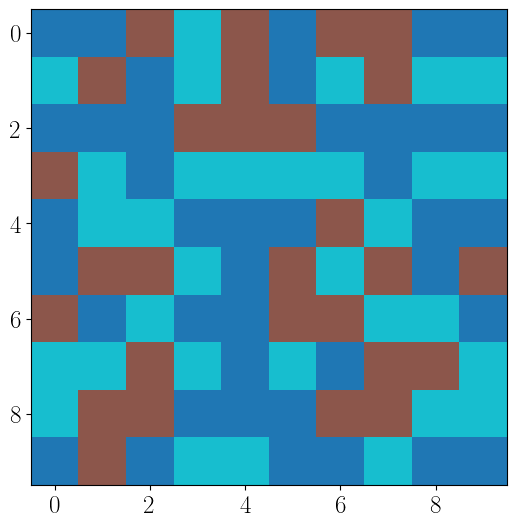

In [105]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0 
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap='tab10',interpolation='nearest')

### Iteramos el modelo unas 1000 veces

In [106]:
for i in range(1000):
    modelo_p1.step()

### Dibujamos los agentes 1000 iteraciones después

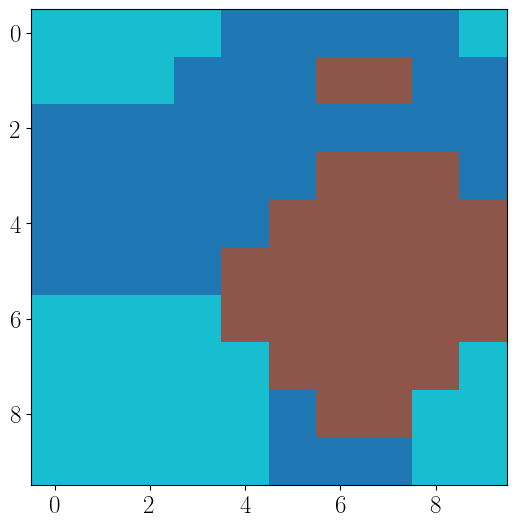

In [107]:
matrix_grid = np.zeros((modelo_p1.grid.width, modelo_p1.grid.height))

for vecino in modelo_p1.grid.coord_iter():
    cell_content, x, y = vecino
    # Como usaremos un mapa de color (cmap) asignaremos un color con el valor 0 y otros dos 
    # colores diferentes con los valores  0.5 y 1
    if cell_content == None:
        matrix_grid[x][y] = 0
    else:
        if cell_content.color == "blue":
            matrix_grid[x][y] = 0.5
        if cell_content.color == "red":
            matrix_grid[x][y] = 1

plt.imshow(matrix_grid, cmap='tab10', interpolation='nearest')

## Obtener datos de nuestro modelo

Como anteriormente habíamos definido las clases `AgenteSchelling` y `ModeloSchelling`, el atributo _tolerancia_ era parte del agente sin embargo es un atributo del modelo. Así que en las siguientes redefiniciones ya forma parte de los atributos del modelo.

In [33]:
class AgenteSchelling(Agent):
    """
    Agente del modelo de Schelling
    Esta clase implementa un agente para el modelo de segregación de Schelling en una malla discreta.
    Atributos:
        tipo/color: "rojo" "azul". Str.
        pos: posición del agente. Tupla de enteros.
        modelo: Nuestro clase modelo. Modelo mesa.
    """
    def __init__(self,unique_id, model,color,pos):
        # Aqui van los atributos del agente
        super().__init__(unique_id,model)
        self.color = color
        self.pos = pos
        self.model  = model
        
    def step(self):
        #Buscar si hay algún otro agente en su vecindad cercana. Para el modelo de segregación utilizamos una vecindad de Moore
        vecinos = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        
        # Contamos cuantos agentes vecinos son similares a nuestro agente
        vecindad = 0
        for i in vecinos:
            if i.color == self.color:
                vecindad += 1 # vecindad = vecindad + 1
                
        vecindad /= 8 # vecindad =  vecindad / 8         
        
        # Si el porcentaje de vecinos es menor a cierto porcentaje de tolerancia,
        # el agente se mueve a un lugar vacío
        if vecindad < self.model.tolerancia:
            self.model.grid.move_to_empty(self)
        

In [34]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        self.tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
    def step(self):
        # Avanza un paso en el tiempo.
        self.schedule.step()

### Definimos una función para saber en promedio cuantos vecinos similares estan alrededor de cada agente

In [ ]:
#Porcentaje de vecinos que son iguales a nuestro agente()
def simi(model):
    promedio_similaridad = []
    for agente in model.schedule.agents:
        vecinos = model.grid.get_neighbors(agente.pos, moore=True, include_center=False)
        similaridad = 0

        for vecino in vecinos:
            if vecino.color == agente.color:
                similaridad += 1
        similaridad /= 8
        promedio_similaridad.append(similaridad)

    promedio_similaridad = np.array(promedio_similaridad)

    return promedio_similaridad.mean()


In [38]:
modelo_test = ModeloSchelling(10,10,60,0.4)
for i in range(100):
    modelo_test.step()
    simi(modelo_test)

### El recolector de datos


In [2]:
from mesa.datacollection import DataCollector

In [39]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        self.tolerancia = 0.4
        colores = ["red", "blue"]
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)
            
        # Recolectamos los datos de la similiaridad de vecinos
        self.datacollector = DataCollector(model_reporters = {'Similitud':simi})

    def step(self):
        # En cada paso recolectamos hacemos la recolección de datos
        self.datacollector.collect(self)
        # Avanza un paso en el tiempo.
        self.schedule.step()

### Inicializamos el modelo y lo corremos 100 veces

Tenemos una malla de 10x10 con 60 agentes colocados al azar y para que se quede en esa posición al menos 40% de sus vecinos deben ser del mismo tipo

In [82]:
modelo_test = ModeloSchelling(10,10,60,0.4)
for i in range(100):
    modelo_test.step()

In [83]:
tabla_datos_modelo = modelo_test.datacollector.get_model_vars_dataframe()

Text(0, 0.5, 'Similaridad del sistema')

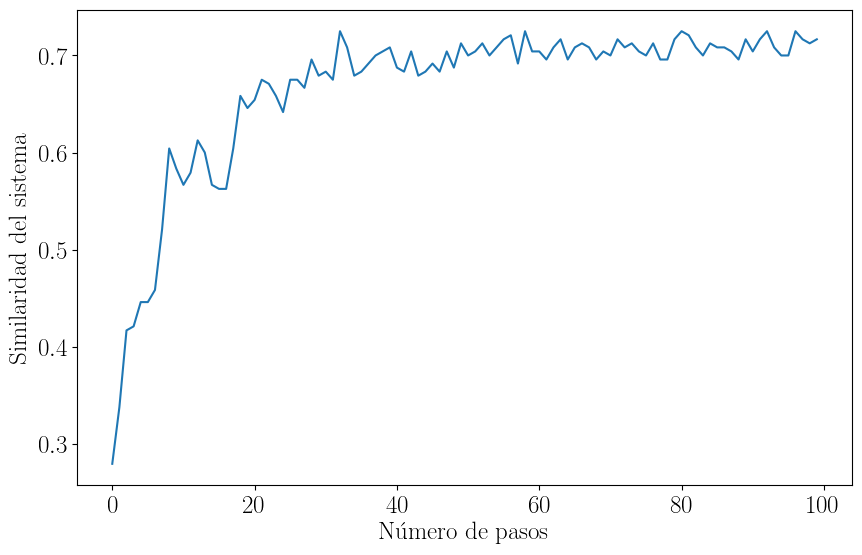

In [79]:
plt.plot(tabla_datos_modelo)
plt.xlabel('Número de pasos')
plt.ylabel('Similaridad del sistema')

Text(0, 0.5, 'Similaridad promedio')

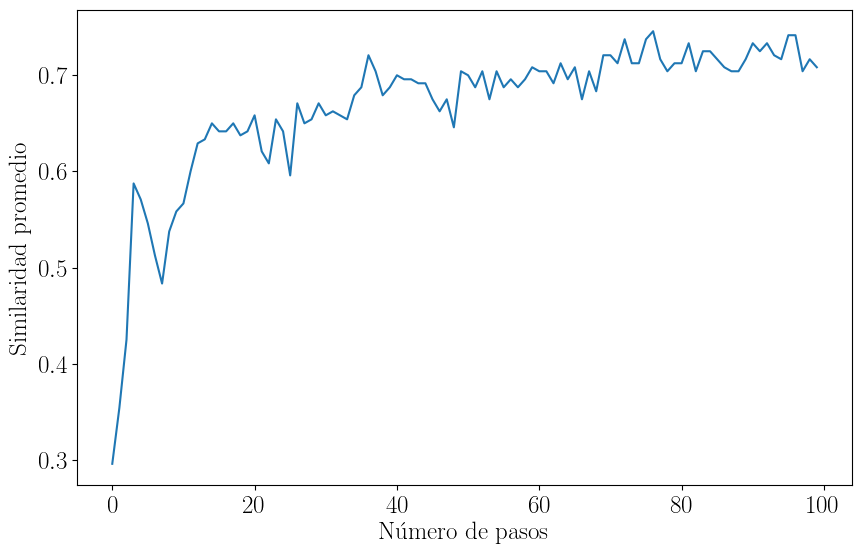

In [85]:
plt.plot(tabla_datos_modelo)
plt.xlabel('Número de pasos')
plt.ylabel('Similaridad promedio')

## Batch Runner

El batch runner nos facilita realizar una exploración estadística de parámetros de nuestro modelo. Para poder activarlo necesitamos escribir el atributo `self.running = True` dentro del nuestra clase modelo.

In [87]:
from mesa.batchrunner import BatchRunner

In [57]:
class ModeloSchelling(Model):
    """
    Modelo de Schelling,
    Esta clase implementa el modelo de segregación de Schelling en una malla discreta.

    ancho: ancho de la malla. Int
    largo: largo de la malla. Int
    cantidad: número de agentes que colocaremos en la malla. Int
    tolerancia: porcentaje de vecinos al menos iguales al del agente. Float.
    """
    def __init__(self,ancho,largo, cantidad,tolerancia):
        self.ancho = ancho
        self.largo = largo
        # Activamos el orden aleatorio
        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(ancho, largo, torus= True)
        self.cantidad = cantidad
        self.tolerancia = 0.4
        colores = ["red", "blue"]
        # parametro necesario para correr el batch runner y la visualización
        self.running = True
        
        for i in range(cantidad):
            color = self.random.choice(colores)
            pos = self.grid.find_empty()
            agente = AgenteSchelling(i,self, color,pos)
            # Después de crear el agente tenemos que colocarlo en la malla
            self.grid.place_agent(agente, pos)
            # De igual forma una vez creado el agente tenemos que 'agendarlo'
            self.schedule.add(agente)

        self.datacollector = DataCollector(model_reporters = {'Similitud':simi})

    def step(self):
        # Avanza un paso en el tiempo.
        self.datacollector.collect(self)
        self.schedule.step()

Usamos un diccionario para los parámetros fijos y otro para los parámetros variables

In [58]:
fixed_params = {'ancho':10,'largo':10, 'cantidad': 60}
variable_params  = {'tolerancia':np.linspace(0.3,0.8,num=20)}

Definimos la especificaciones del *batch run*. `max_steps` es el número de pasos que correrá el modelo dados unos parámetros iniciales, en este caso serán `100` pasos. `iterations` es. Dados los parámetros que hemos definido, tenemos que en todas las simulaciones el ancho y el largo de la malla de 10x10 con 60 agentes desde siempre. 

In [75]:
batch_run = BatchRunner(
    ModeloSchelling,
    variable_params,
    fixed_params,
    iterations=10,
    max_steps=100,
    model_reporters={"Similaridad": simi}
)

In [88]:
# Ejecutamos el batch run
batch_run.run_all()

200it [00:38,  5.25it/s]


In [89]:
# obtenemos los datos de la propiedad del que medimos de nuestro modelo
datos  = batch_run.get_model_vars_dataframe()

In [93]:
datos

,tolerancia,Run,Similaridad,ancho,largo,cantidad
0,0.3,0,0.679167,10,10,60
1,0.3,1,0.650000,10,10,60
2,0.3,2,0.691667,10,10,60
3,0.3,3,0.720833,10,10,60
4,0.3,4,0.704167,10,10,60
...,...,...,...,...,...,...
195,0.8,195,0.704167,10,10,60
196,0.8,196,0.729167,10,10,60
197,0.8,197,0.700000,10,10,60
198,0.8,198,0.725000,10,10,60


Cada punto en la gráfica es el resultado final de la _similaridad_ después de una corrida de 100 pasos. Para cada valor de _tolerancia_ tenemos 10 puntos.

(0.0, 1.0)

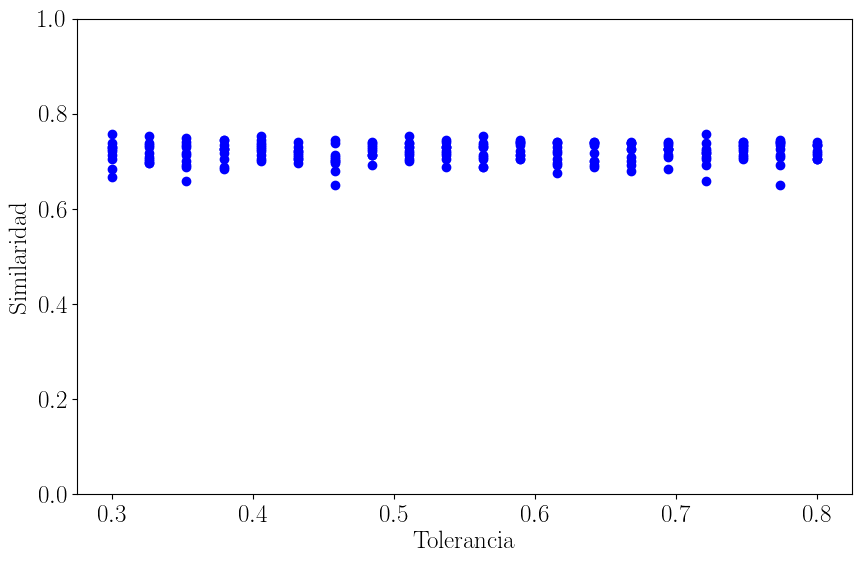

In [86]:
plt.plot(datos.tolerancia, datos.Similaridad,'bo')
plt.xlabel('Tolerancia')
plt.ylabel('Similaridad')
plt.ylim(0,1)

## Visualización

Para la visualización se necesita colocar la clase modelo y agente en un archivo separado, por ejemplo `ModeloSegregacion.py`, del archivo para la visualización, por ejemplo `ModeloSegregacion_Viz.py`. Para lanzar la visualización se ejecuta el archivo la visualización, `python ModeloSegregacion_Viz.py` esto abrirá una ventana dentro de nuestro navegador predeterminado.

In [ ]:
from mesa.visualization.modules import CanvasGrid, ChartModuledule
from mesa.visualization.ModularVisualization import ModularServer

# Separamos la clase ModeloSchelling y AgenteSchelling en archivo diferente al de la visualización
from ModeloSegregacion import ModeloSchelling

# La función agent_portrayal toma un objeto agente y regresa un diccionario con las propiedades de la forma 
# en la que será representado en la visualización
def agent_portrayal(agent):
    portrayal = {"Shape": "rect",
                 "Color": agent.color,
                 "Filled": "true",
                 "Layer": 0,
                 "w": 1,
                 "h": 1}
    return portrayal

# Definimos una malla de 30x30 con una resolución de 500x500 pixeles
grid = CanvasGrid(agent_portrayal, 30, 30, 500, 500)

# Agregamos un gráfico que va monitoreandoque va actualizándose paso a paso. En la 
chart = ChartModule([{"Label": "Similaridad",
                      "Color": "Black"}],
                    data_collector_name='datacollector')

# Cargamos tanto la malla como el gráfico dentro de ModularServer además especificamos
# los parámetros que utilizaremos en la simulación
server = ModularServer(ModeloSchelling,
                       [grid,chart],
                       "Modelo de segregacion",
                       {"density":0.5, "umbral":0.4, "width":30, "height":30})

server.port = 8521 # The default
server.launch() 